In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

def search_col(tab,key):
    for cols in tab.columns:
        if (cols.find(key)>-1):
            print(cols)


2.2.0
2.2.0


In [4]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [5]:
get_mag_cubes_SAMI="tables/get_mag_cubes_SAMI_KG_reshift.csv"
col_mag_cubes_SAMI=header_columns_space(get_mag_cubes_SAMI,2)
tab_mag_SAMI=ascii.read(get_mag_cubes_SAMI, delimiter=',', \
                        guess=True, comment='\s*#', names=col_mag_cubes_SAMI,\
                      fill_values=[('BAD', np.nan)])
cubenames=[]
for name in tab_mag_SAMI['name-obj']:
    name = name.replace('SAMI','SAMI-')
    name = 'KG-'+name
    cubenames.append(name)
cubenames = np.array(cubenames)
tab_mag_SAMI['cubename'] = cubenames

In [6]:
tab_KG_sel = Table.read('tables/tab_KG_sel_add.ecsv')

In [7]:
tab_mag_SAMI['cubename']

KG-SAMI-15847
KG-SAMI-16026
KG-SAMI-16487
KG-SAMI-197866
KG-SAMI-202398
KG-SAMI-202399
KG-SAMI-202480
KG-SAMI-202531
KG-SAMI-202636
...
KG-SAMI-91627


In [8]:
tab_KG_sel['cubename']

KG-MaNGA-1-178894
KG-MaNGA-1-179173
KG-MaNGA-1-179071
KG-MaNGA-1-178794
KG-MaNGA-1-54940
KG-MaNGA-1-277
KG-MaNGA-1-55227
KG-MaNGA-1-954
KG-MaNGA-1-383
...
KG-MaNGA-1-82991


In [10]:
tab_join = join(tab_mag_SAMI,tab_KG_sel,\
                    keys=['cubename'],join_type='left')
print(len(tab_join))

169


In [11]:
list_columns(tab_join.columns)

name-obj                   B_band_mag                 Pa                         error_Mass_phot.           
redshift                   B_band_mag_error           R50                        nRe                        
error_redshift             B_band_abs_mag             error_R50                  V-band_SB_at_Re            
u_band_mag                 B_band_abs_mag_error       R90                        error_V-band_SB_at_Re      
u_band_mag_error           V_band_mag                 error_R90                  V-band_SB_at_R_50          
u_band_abs_mag             V_band_mag_error           C                          error_V-band_SB_at_R_50    
u_band_abs_mag_error       V_band_abs_mag             error_C                    cubename                   
g_band_mag                 V_band_abs_mag_error       SN_at_Re                   KGAS_ID                    
g_band_mag_error           R_band_mag                 error_SN_at_Re             IAUNAME                    
g_band_abs_mag     

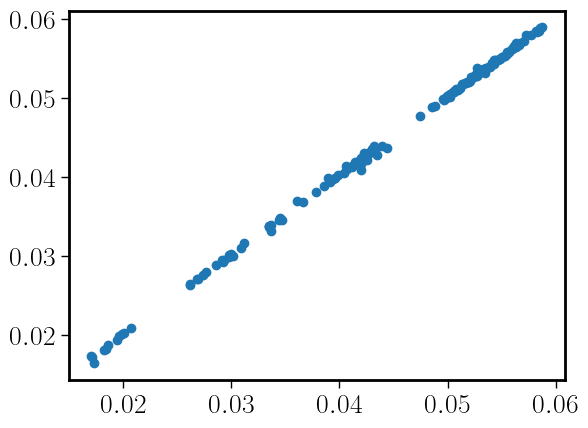

In [12]:
plt.scatter(tab_join['redshift'],tab_join['Z'])